# Projet Fashion Deep Learning

In [1]:
import random

import numpy as np
import pickle, gzip
import seaborn as sns
np.random.seed(123) # for reproducibility

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,confusion_matrix

2023-03-02 09:32:38.124900: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 09:32:38.450819: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-02 09:32:38.450842: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-02 09:32:39.283921: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# On importe nos données depuis Keras 
tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

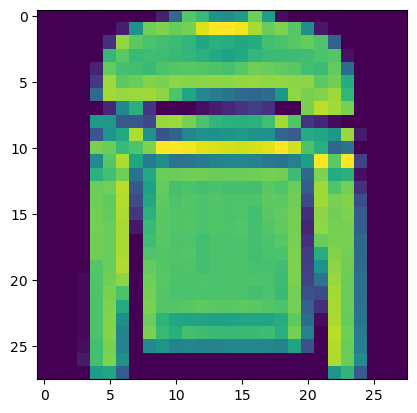

In [4]:
plt.imshow(X_train[5]) # contenu de la ligne 5

In [5]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

On va donc devoir normaliser les photos car les éléments des matrices ne sont majoritairement pas comprises entre 0 et 1. D'où l'intérêt de tout diviser par 255 pour être sûr d'avoir un résultat exploitable qui nous permettra de faire passer le X_train et le X_test dans un réseau de neurones

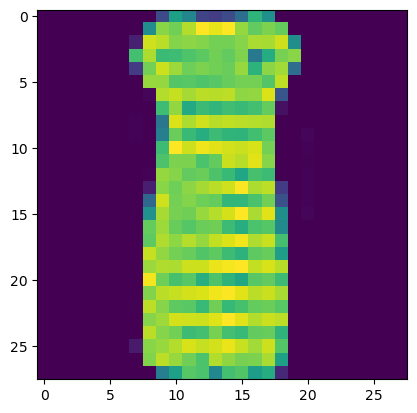

In [6]:
plt.imshow(X_train[568])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.34509804, 0.7372549 , 0.6745098 , 0.51764706, 0.49019608,
        0.55294118, 0.78039216, 0.56078431, 0.03529412, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.07843137, 0.51372549, 0.78039216, 0.80784314,
        0.76862745, 0.79215686, 0.94901961, 1.        , 1.        ,
        0.98039216, 0.87058824, 0.77254902, 0.80784314, 0.7372549 ,
        0.49411765, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.1372549 , 0.83921569, 0.74901961, 0.71764706, 0.69803922,
        0.68627451, 0.65882353, 0.58823529, 0.63529412, 0.62352941,
        0.59607843, 0.6196

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
X_train.shape

(60000, 28, 28)


Le dataset Fashion MNIST se compose de 60 000 images couleur de 28x28 pixels réparties en 10 classes, avec 6 000 images par classe.

Il y aura 50 000 images d'entraînement et 10 000 images de test.

In [11]:
# On splite nos données à entraîner et celles à tester

from sklearn.model_selection import train_test_split
X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.9)
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.9)

In [12]:
X_train.shape

(6000, 28, 28)

In [13]:
# Fonction d'affichage des données
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb image*Ny*Nx
    plt.figure(figsize=(7.2, 7.2))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(30):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()

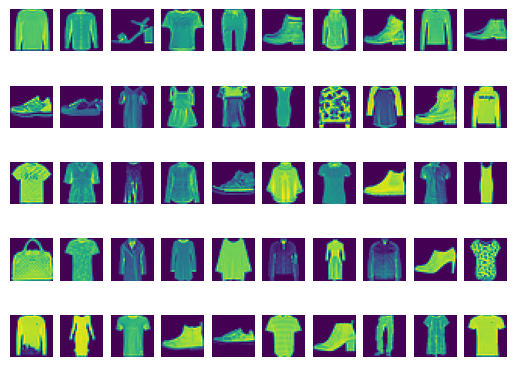

In [23]:

#Afficher les 20 premieres images
for i in range(50):
    plt.subplot(5,10,i+1)# à adapter
    plt.imshow(X_train[i,:])
    plt.axis('off')
plt.show()# indentation externe à la boucle

In [45]:
y_train[:20]

array([2, 6, 5, 0, 1, 9, 4, 9, 2, 9, 7, 7, 6, 6, 6, 3, 4, 0, 9, 2],
      dtype=uint8)

In [46]:
# Reshape des données sur le y
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_train.shape,y_test.shape

((6000,), (1000,))

In [34]:
# reshape sur le X
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [35]:
#convertir les données en flottants de 32 bits
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [36]:
# Fonction d'affichage des graphes

def affiche(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
     

In [37]:
labels =['tshirt','pantalon','pullover','robe','manteau','sandale','chemise','espadrille','sac','bottine']

In [38]:

print("nombre d'images en train : ", len(X_train))
print("nombre d'images en test : ", len(X_test))

print("la taille des images est : ", len(X_train[0]),'x',len(X_train[0][0]),"pixels")

print("Nombre de  de classes : ", len(labels))

nombre d'images en train :  6000
nombre d'images en test :  1000
la taille des images est :  28 x 28 pixels
Nombre de  de classes :  10


In [39]:
# Encoding
import tensorflow as tf
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [40]:
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input

# Définition du réseau de neurones

inputs = Input(shape=(28,28,1))  # RGB 3 couleurs élémentaires # 1 car noir et blanc
x = inputs
x = Convolution2D(28, kernel_size = (3, 3), activation='relu' )(x) 
x = Convolution2D(56, kernel_size = (3, 3), activation='relu' )(x) 
x = MaxPooling2D((3, 3))(x) 
x = Flatten()(x) 
x = Dense(256, activation='relu')(x)  
outputs= Dense(10, activation='softmax')(x) 
model = Model(inputs, outputs) 
model.summary()
     


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 56)        14168     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 56)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3584)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               917760    
                                                           

In [41]:
X_train.shape

(6000, 28, 28, 1)

Epoch 1/26
24/24 [==============================] - 3s 119ms/step - loss: 1.2423 - accuracy: 0.5925 - val_loss: 0.7475 - val_accuracy: 0.7280
Epoch 2/26
24/24 [==============================] - 2s 101ms/step - loss: 0.6545 - accuracy: 0.7572 - val_loss: 0.6835 - val_accuracy: 0.7050
Epoch 3/26
24/24 [==============================] - 2s 94ms/step - loss: 0.5629 - accuracy: 0.7903 - val_loss: 0.4828 - val_accuracy: 0.8230
Epoch 4/26
24/24 [==============================] - 2s 89ms/step - loss: 0.4777 - accuracy: 0.8200 - val_loss: 0.4589 - val_accuracy: 0.8210
Epoch 5/26
24/24 [==============================] - 2s 101ms/step - loss: 0.4401 - accuracy: 0.8330 - val_loss: 0.5455 - val_accuracy: 0.7910
Epoch 6/26
24/24 [==============================] - 2s 91ms/step - loss: 0.4192 - accuracy: 0.8393 - val_loss: 0.4516 - val_accuracy: 0.8340
Epoch 7/26
24/24 [==============================] - 2s 91ms/step - loss: 0.3778 - accuracy: 0.8582 - val_loss: 0.4571 - val_accuracy: 0.8290
Epoch 8/26

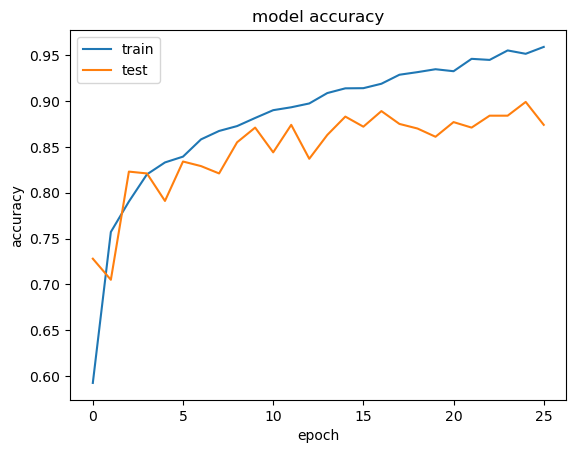

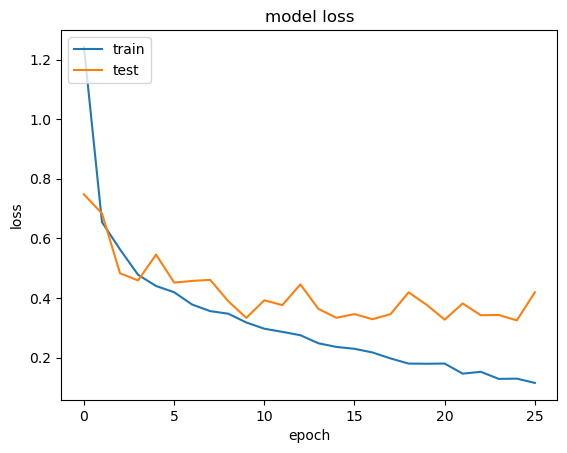

lr= 0.13 batch_size= 256 epochs= 26
Temps d apprentissage 60.75896975499995


In [42]:
import time

# Apprentissage

lr= 0.13
batch_size=256
epochs=26
sgd1= tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
tps1 = time.perf_counter()
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
verbose=1,validation_data=(X_test, Y_test))
tps2 = time.perf_counter()
affiche(history) # donnée en annexe
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs)
print('Temps d apprentissage',tps2 - tps1)

In [43]:
# Evaluation du modèle
from sklearn.metrics import confusion_matrix


score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.41893354058265686
Test accuracy: 87.40000128746033
